# Multiclass Classification Project on Drug Classification

## inLab

**Company Introduction**

Your client for this project is a pharmaceutical company.

They have a long history of making effective drugs and are the leading producer of antibiotics for bacterial infection. Their research and development team have recently developed five types of drugs to fight against chronic throat infection. They want to quickly release the drug in the market so that they could cure people and increase revenue for the company. Their R&D team made a brief analysis of the chemical composition present in the drug and made a brief report stating that each drug has a different effect according to their health. The drug which has a higher concentration of chemicals should be given to those groups of people whose health report passes some criteria as suggested by the R&D team.

**Current Scenario**
The R&D group has invited some groups of people to test the drug, but going through each person’s health report might take a lot of time and cause a delay in launching the drug in the market. Activity Logs

**Problem Statement**
The current process suffers from the following problems:

Testing phase takes a lot of time and it's done manually because they need to carefully examine each person for the side effects.
Most of the crucial time is being wasted in checking each person’s health report and dispensing specific drugs according to the health metric as suggested by the R&D team.
This process is time-consuming and wastage of resources.
The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.

**Your Role**
You are given a dataset containing the health report of the people from the test group.
Your task is to build a multi-class classification model using the dataset.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. - You need to build the best possible model.

**Project Deliverables**
- **Deliverable:** Drug classification. 
- **Machine Learning Task:** Multi-class classification 
- **Target Variable:** Drug  
- **Win Condition:** N/A (best possible model)

**Evaluation Metric** The model evaluation will be based on the **Accuracy Score**.

**Data Description**
The dataset contains all the necessary information about the person’s health like their sex, BP, Age, Cholesterol etc.

We have the health metrics of the person which is an essential factor for transcribing the drug to that person without any side effect.

This is the data that we have to predict for future samples.

The dataset is divided into two parts: Train, and Test sets.

**Train Set:**
- The train set contains 160 rows and 7 columns.
- The last column Drug is the target variable.

**Test Set:**
- The test set contains 40 rows and 6 columns.
- The test set doesn’t contain the Drug column.
- It needs to be predicted for the test set.

In [123]:
import pandas as pd  # for data loading, manipulation, analysis
import numpy as np  # for scientific Calculations
import matplotlib.pyplot as plt #for data visualizations
import seaborn as sns # for advance data visualizations
import warnings 
warnings.filterwarnings('ignore')


In [124]:
traindf = pd.read_csv("C:\\Users\\irosh\\Downloads\\drug_train.csv") # loading the train dataset 
testdf = pd.read_csv("C:\\Users\\irosh\\Downloads\\drug_test.csv") # loading the test dataset

In [125]:
traindf.head() # inorder to view first 5 rows we use head() method


,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY


In [126]:
testdf.head()

,Id,Age,Sex,BP,Cholesterol,Na_to_K
0,95,36,M,LOW,NORMAL,11.424
1,15,16,F,HIGH,NORMAL,15.516
2,30,18,F,NORMAL,NORMAL,8.750
3,158,59,F,LOW,HIGH,10.444
4,128,47,M,LOW,NORMAL,33.542


In [127]:
traindf.info() # It provides a summary of the DataFrame's structure, including the number of rows, columns, data types, memory usage, and non-null counts for each column.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


In [128]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           40 non-null     int64  
 1   Age          40 non-null     int64  
 2   Sex          40 non-null     object 
 3   BP           40 non-null     object 
 4   Cholesterol  40 non-null     object 
 5   Na_to_K      40 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ KB


In [129]:
traindf.describe(include='all') # for obtaining descriptive statistics, such as count, mean, standard deviation, minimum, maximum, and percentiles. include='all' makes sure each column is included irrespective to the datatype of the column 

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,160.000000,160.000000,160,160,160,160.000000,160
unique,NaN,NaN,2,3,2,NaN,5
top,NaN,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,NaN,83,62,88,NaN,76
mean,99.075000,45.387500,NaN,NaN,NaN,16.194987,NaN
std,59.374894,16.101481,NaN,NaN,NaN,7.254689,NaN
min,0.000000,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,45.500000,32.000000,NaN,NaN,NaN,10.445250,NaN
50%,100.500000,46.000000,NaN,NaN,NaN,14.076500,NaN
75%,149.500000,58.250000,NaN,NaN,NaN,19.480750,NaN


In [130]:
testdf.describe(include='all')

,Id,Age,Sex,BP,Cholesterol,Na_to_K
count,40.00000,40.000000,40,40,40,40.000000
unique,NaN,NaN,2,3,2,NaN
top,NaN,NaN,M,LOW,NORMAL,NaN
freq,NaN,NaN,21,17,25,NaN
mean,101.20000,40.025000,NaN,NaN,NaN,15.642475
std,52.12667,17.778534,NaN,NaN,NaN,7.173492
min,9.00000,16.000000,NaN,NaN,NaN,7.261000
25%,65.75000,24.500000,NaN,NaN,NaN,10.735000
50%,94.00000,38.000000,NaN,NaN,NaN,12.867500
75%,148.50000,53.250000,NaN,NaN,NaN,19.100250


**Label encoding** is used to convert **categorical variables** into **numerical values**, as most machine learning models cannot directly work with non-numerical data. 

- **Sex:** Encoded as 0 (Male) and 1 (Female).
- **BP:** Encoded based on categories (e.g., Low=0, Normal=1, High=2).
- **Cholesterol:** Encoded as 0 (Normal) and 1 (High).
- **Drug:** Encoded for the target variable (e.g., DrugA=0, DrugB=1, DrugC=2, etc.).

In [132]:
from sklearn.preprocessing import LabelEncoder # for encoding/ converting categorical data to numerical data

categorical_columns =["Sex", "BP", "Cholesterol", "Drug"]
# initializing label encoder
le = LabelEncoder()

# applying labelencoder to the categorical columns using fit_transform method
for col in categorical_columns:
    traindf[col] = le.fit_transform(traindf[col])


In [133]:
from sklearn.preprocessing import LabelEncoder

categorical_columns =["Sex", "BP", "Cholesterol"]

le = LabelEncoder()

for col in categorical_columns:
    testdf[col] = le.fit_transform(testdf[col])


In [134]:
from ydata_profiling import ProfileReport #YData Profiling generates a detailed report for datasets, covering statistics, distributions, missing values, memory usage, and more, enabling efficient data exploration and analysis.

In [135]:
# generating the profile report for train dataset 
trainprofile = ProfileReport(traindf, title="Profiling Report")


In [136]:
trainprofile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [137]:
testprofile = ProfileReport(testdf, title="Test Profiling Report")

In [138]:
testprofile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [139]:
# Drop the 'Id' column from both datasets (it's irrelevant for predictions)
traindf = traindf.drop(columns=['Id'])
testdf = testdf.drop(columns=['Id'])

In [140]:
from sklearn.model_selection import train_test_split # for splitting the dataset into train and test sets
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # for loading the ensemble models from sklearn
from sklearn.tree import DecisionTreeClassifier # for loading the decision tree classifier
from xgboost import XGBClassifier # for loading the XGBclassifier from xgboost library
from sklearn.linear_model import LogisticRegression # for loading logisticRegression model from linear models in sklearn
from sklearn.metrics import accuracy_score, classification_report # for evaluating the models based on their accuracy from sklearn metrics
# Split traindf into features and target
X = traindf.drop(columns=['Drug'])  # Features
y = traindf['Drug']  # Target

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Random Forest

**How it Works:**
- Random Forest combines multiple Decision Trees (an ensemble) by training each tree on a random subset of the data and features.
- Predictions are aggregated by majority voting.

**Mathematics:**
- Each Decision Tree works as described above.
- Randomness is introduced by:
  1. **Bootstrap Sampling**: Training each tree on a randomly sampled subset of the data.
  2. **Random Feature Selection**: Splitting nodes using a random subset of features.
- Final prediction combines outputs of all trees:
  
   $
    \text{Prediction} = \text{mode of all tree predictions (classification)}.
   $

**Advantages:**
- Reduces overfitting by averaging multiple models.
- Handles the noise better than a single Decision Tree.

---


In [142]:
# Random Forest Model
#initializing the random forest classifier
rf_model = RandomForestClassifier(random_state=42)
# training the model on the train sets using fit method
rf_model.fit(X_train, y_train)

# Predictions are made on the test set using predict method
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model 
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        12

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32




## **Decision Tree**

**How it Works:**
- A Decision Tree splits the data based on feature values, creating branches for each decision.
- At each step, it chooses the split that minimizes impurity (measures like **Gini Index** or **Entropy**).

**Mathematics:**
1. **Gini Index**: Measures the impurity of a split. For a class distribution  $(p_1, p_2, \dots, p_k)$ , the Gini Index is:

   $
   G = 1 - \sum_{i=1}^{k} p_i^2
   $

  The split with the lowest Gini Index is selected.

2. **Entropy**: Measures the uncertainty in the data:
  
  $
   H = -\sum_{i=1}^{k} p_i \log_2(p_i)
  $
  
  Like Gini, the split with the lowest entropy is chosen.

**Example:**
If splitting on `BP`:
- For `BP = Low`, calculate Gini or Entropy based on the class distribution of `Drug`.
- Repeat this process for `BP = Normal` and `BP = High`, and choose the split with the lowest impurity.


In [144]:

# Initialize Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# training the model on the train sets using fit method
dt_model.fit(X_train, y_train)

# Predictions are made on the test set using predict method
y_pred_dt = dt_model.predict(X_test)

# Evaluating the model 
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Classifier:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        12

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



## Gradient Boosting

**How it Works:**
- Gradient Boosting builds trees sequentially, with each tree trying to correct the residuals (errors) of the previous one.

**Mathematics:**
1. **Residuals**:
   At each step $(m)$, the model predicts residuals (errors):
   
   $
   r_i^{(m)} = y_i - f^{(m-1)}(X_i)
   $

2. **Tree Construction**:
   Each tree is trained to minimize the loss of the residuals. For classification, it uses log loss.

3. **Final Prediction**:
   Combine predictions of all trees:
   
   $
   F(X) = \sum_{m=1}^{M} \alpha_m T_m(X)
   $
   
   where $(T_m(X))$ is the $(m)-th$ tree, and $(\alpha_m)$ is its weight.


In [146]:

# initializing Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)

# training the model on the train sets using fit method
gb_model.fit(X_train, y_train)

# Predictions are made on the test set using predict method
y_pred_gb = gb_model.predict(X_test)

# Evaluating the model 
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Classifier:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        12

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



## XGBoost

**How it Works:**
- XGBoost is an enhanced Gradient Boosting model with optimizations like regularization and advanced tree pruning.

**Mathematics:**
1. Adds a regularization term to the objective function to prevent overfitting:
   
   $
   Obj = \sum_{i=1}^N L(y_i, \hat{y}_i) + \sum_{j=1}^T \Omega(T_j)
   $
   
   where $(\Omega(T_j))$ penalizes the complexity of tree $(T_j)$.

2. Uses **Second-Order Gradient** for optimization:
   
   $
   g_i = \frac{\partial L}{\partial \hat{y}_i}, \quad h_i = \frac{\partial^2 L}{\partial \hat{y}_i^2}
   $
   
   The tree splits are based on both gradients $(g_i)$ and Hessians $(h_i)$.

---

In [148]:

# Initializing XGBoost Model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# training the model on the train sets using fit method
xgb_model.fit(X_train, y_train)

# Predictions are made on the test set using predict method
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating the model 
print("XGBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Classifier:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        12

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32




## Logistic Regression

**How it Works:**
- Logistic Regression predicts the probability of each class using a **logistic function** (sigmoid for binary, softmax for multi-class).

**Mathematics:**
1. **Linear Model**:
   For input features $(X = [x_1, x_2, \dots, x_n])$, it calculates a linear combination:
   
   $
   z = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
   $
   
   where $(w_i)$ are weights, and $(b)$ is the bias term.

2. **Softmax Function**:
   Converts $(z)$ into probabilities for multi-class classification:
   
   $
   P(y = k | X) = \frac{\exp(z_k)}{\sum_{j=1}^{K} \exp(z_j)}
   $

3. **Loss Function**:
   Uses **Cross-Entropy Loss**:
   
   $
   L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{i,k} \log P(y_{i,k})
   $
   
   where $y_{i,k})$ is 1 if the sample belongs to class $(k)$, and 0 otherwise.


In [150]:

# initializing the Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# training the model on the train sets using fit method
lr_model.fit(X_train, y_train)

# Predictions are made on the test set using predict method
y_pred_lr = lr_model.predict(X_test)

# Evaluating the model 
print("Logistic Regression Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Classifier:
Accuracy: 0.90625

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.33      1.00      0.50         1
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         3
           4       0.92      1.00      0.96        12

    accuracy                           0.91        32
   macro avg       0.65      0.80      0.69        32
weighted avg       0.86      0.91      0.88        32



## Support Vector Machine (SVC- Support Vector Classifier) 
SVM (Support Vector Machine) is a classification algorithm that finds the best boundary (or hyperplane) to separate different classes in the feature space. It maximizes the margin between classes, which helps in making accurate predictions.

### How SVM works?:
1. **Training**: SVM learns to classify drugs based on features like age, sex, and blood pressure from the training data (`X_train`, `y_train`).
2. **Hyperplane**: It finds a decision boundary that best separates the drug classes by maximizing the distance between the closest data points (support vectors).
3. **Prediction**: For new data (`X_test`), SVM uses the learned boundary to predict the correct drug class.

SVM can handle both linear and non-linear separations and is effective for multi-class classification problems.

In [152]:
from sklearn.svm import SVC
# Initialize SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42, probability=True)

# Train the model on the training data
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {svm_accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))



SVM Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        12

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



### Checking XGBoost for overfitting

1. **Training the XGBoost Model**  

   ```python
   xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
   xgb_model.fit(X_train, y_train)
   ```
 - The model is trained using the training data (`X_train`, `y_train`).
 - `random_state=42` ensures reproducibility, and `eval_metric='mlogloss'` optimizes the logarithmic loss.

---

2. **Evaluating on the Training Set**  

   ```python
   y_pred_train = xgb_model.predict(X_train)
   train_accuracy = accuracy_score(y_train, y_pred_train)
   print("XGBoost Training Accuracy:", train_accuracy)
   ```
   
  - The model predicts labels for the training set.
 - Accuracy is calculated as the ratio of correct predictions to total predictions.

---

3. **Evaluating on the Validation Set**  

   ```python
   y_pred_test = xgb_model.predict(X_test)
   val_accuracy = accuracy_score(y_test, y_pred_test)
   print("XGBoost Validation Accuracy:", val_accuracy)
   ```
   
 - Predictions are made on the unseen validation set (`X_test`).
  - Validation accuracy measures how well the model generalizes to new data.

---

4. **Checking for Overfitting**  

   ```python
   if abs(train_accuracy - val_accuracy) > 0.1:
       print("The model is likely overfitting. Consider tuning hyperparameters or using regularization.")
   else:
       print("The model shows no significant signs of overfitting and is ready for prediction.")
   ```
   
 - Compares training and validation accuracy.
 - If the difference exceeds 10%, it suggests overfitting (model memorizes training data but performs poorly on new data).

---

### **Key Concepts**
1. **Accuracy**:  
       Accuracy = Correct Predictions / Total Predictions

2. **Overfitting**:  
   When the model performs well on training data but poorly on unseen data due to memorizing rather than generalizing.

3. **Regularization**:  
   Penalizes model complexity to reduce overfitting. XGBoost includes L1 (lasso) and L2 (ridge) regularization.

4. **Log Loss**:  
   A metric to evaluate the quality of probabilistic predictions. Lower values indicate better performance.

In [154]:
# Train XGBoost on the training set
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Evaluate on training set
y_pred_train = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("XGBoost Training Accuracy:", train_accuracy)

# Evaluate on validation set
y_pred_test = xgb_model.predict(X_test)
val_accuracy = accuracy_score(y_test, y_pred_test)
print("XGBoost Validation Accuracy:", val_accuracy)

# Check for overfitting
if abs(train_accuracy - val_accuracy) > 0.1:
    print("The model is likely overfitting. Consider tuning hyperparameters or using regularization.")
else:
    print("The model shows no significant signs of overfitting and is ready for prediction.")


XGBoost Training Accuracy: 1.0
XGBoost Validation Accuracy: 1.0
The model shows no significant signs of overfitting and is ready for prediction.


In [155]:
# Predicting the 'Drug' column for testdf
testdf['Drug'] = xgb_model.predict(testdf)

# Displaying the updated testdf with predictions
print("Predicted 'Drug' column for testdf:")
print(testdf)


Predicted 'Drug' column for testdf:
    Age  Sex  BP  Cholesterol  Na_to_K  Drug
0    36    1   1            1   11.424     4
1    16    0   0            1   15.516     0
2    18    0   2            1    8.750     4
3    59    0   1            0   10.444     3
4    47    1   1            1   33.542     0
5    51    1   0            0   18.295     0
6    18    0   0            1   24.276     0
7    28    0   2            0   12.879     4
8    42    1   0            1   12.766     1
9    66    0   2            1    8.107     4
10   29    1   0            0   12.856     1
11   20    0   1            1   11.686     4
12   38    1   1            0   18.295     0
13   19    0   0            0   13.313     1
14   70    1   0            0    9.849     2
15   25    1   2            0   19.011     0
16   65    1   0            1   11.340     2
17   55    1   2            1    7.261     4
18   32    0   1            0    9.712     3
19   54    1   2            0   24.658     0
20   53    0   0   

In [156]:
# Saving predictions to a CSV file
testdf.to_csv("testdf_with_predictions.csv", index=False)


## Confusion Matrix 

1. **Imports:**
   - `matplotlib.pyplot` and `seaborn`: For plotting.
   - `confusion_matrix`: To calculate the confusion matrix.

2. **`plot_confusion_matrix` function:**
   - Takes model name, true labels (`y_test`), predicted labels (`y_pred_*`), and class names.
   - Calculates and plots the confusion matrix using a heatmap.

3. **Class Names:**
   - Extracts unique class names from `y_test`.

4. **Plot Confusion Matrices:**
   - Calls `plot_confusion_matrix()` for each model (Random Forest, Gradient Boosting, Decision Tree, XGBoost, Logistic Regression).



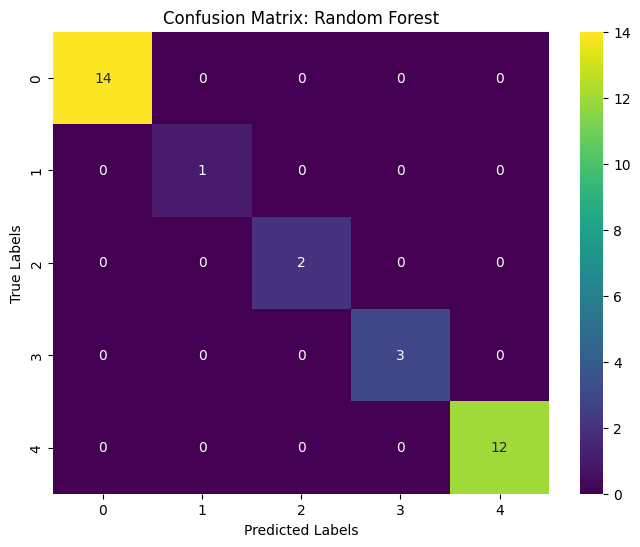

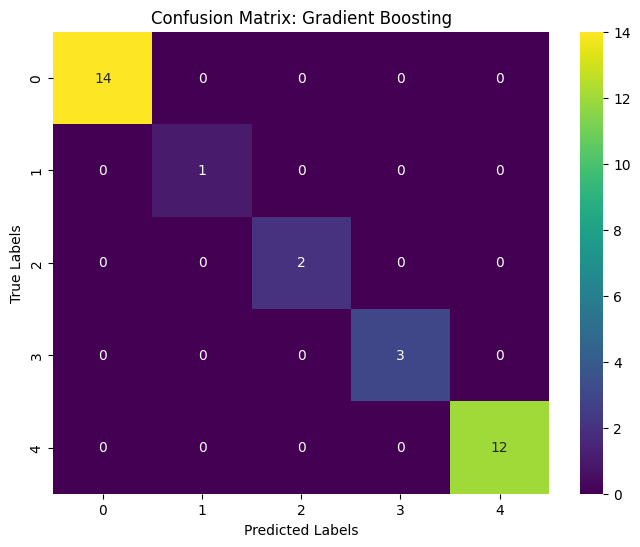

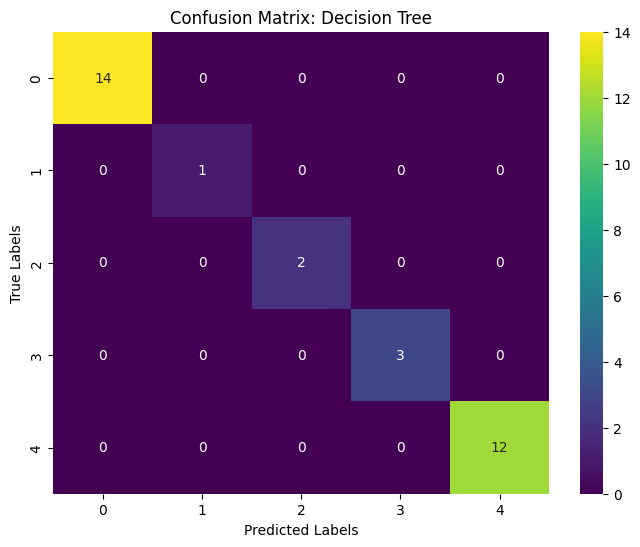

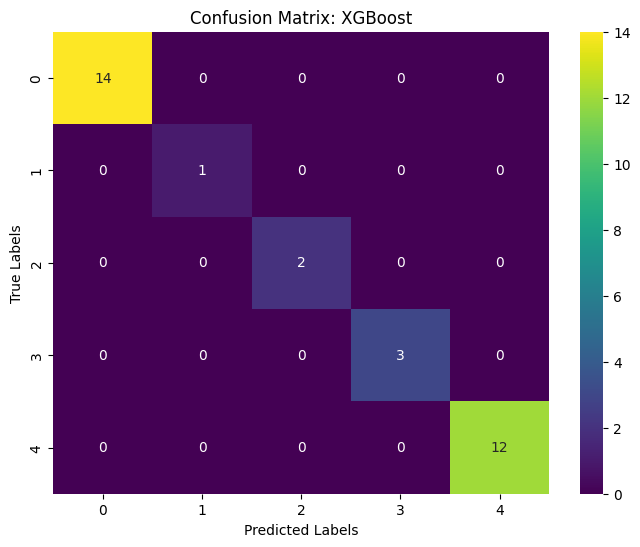

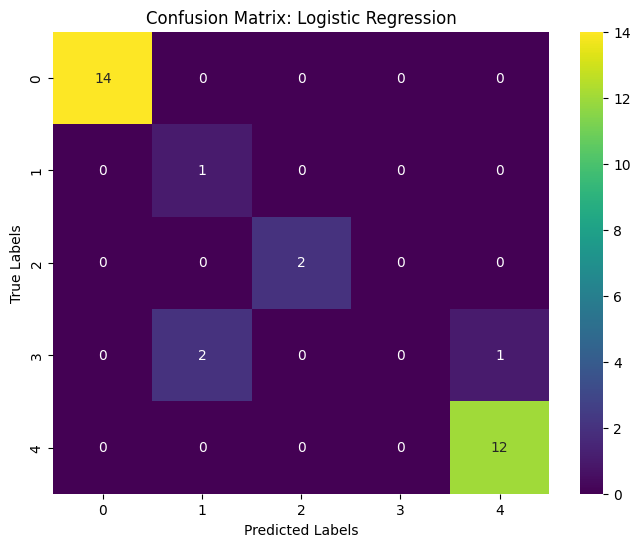

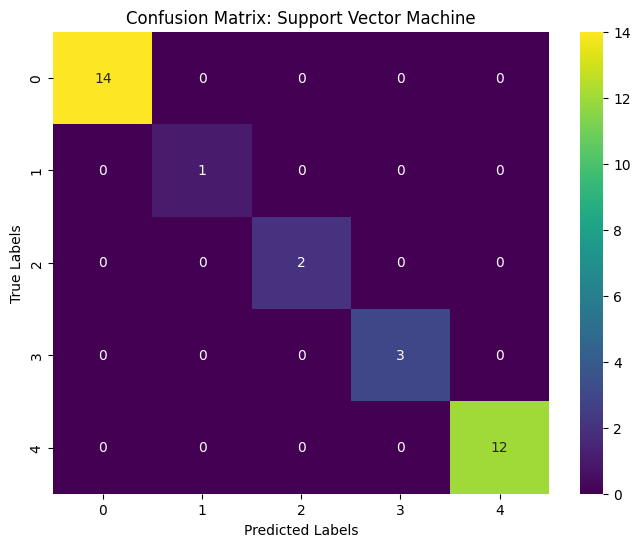

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model_name, true_labels, predicted_labels, class_names):
    """
    Plots the confusion matrix for a single model.

    Parameters:
        model_name (str): Name of the model.
        true_labels (list): Ground truth labels.
        predicted_labels (list): Predicted labels by the model.
        class_names (list): List of class names for the labels.
    """
    cm = confusion_matrix(true_labels, predicted_labels)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Get unique class names from y_test
class_names = sorted(set(y_test))  # Automatically get unique class names from `y_test`

# Plot confusion matrices for each model
plot_confusion_matrix("Random Forest", y_test, y_pred_rf, class_names)
plot_confusion_matrix("Gradient Boosting", y_test, y_pred_gb, class_names)
plot_confusion_matrix("Decision Tree", y_test, y_pred_dt, class_names)
plot_confusion_matrix("XGBoost", y_test, y_pred_xgb, class_names)
plot_confusion_matrix("Logistic Regression", y_test, y_pred_lr, class_names)
plot_confusion_matrix("Support Vector Machine", y_test, y_pred_svm, class_names)


---

### **What is an ROC Curve?**
- **Receiver Operating Characteristic (ROC)** curve is a graphical representation of a classifier's performance.
- It plots the **True Positive Rate (TPR)** (sensitivity/recall) against the **False Positive Rate (FPR)** at various classification thresholds.
  
**Key Metrics:**
- **TPR (Sensitivity)** = $\frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$
- **FPR** = $\frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}$
- **AUC (Area Under the Curve)**: A single number summarizing the ROC curve. Higher AUC indicates better classifier performance.

---

1. **Importing Libraries**:
   - **`roc_curve`** and **`auc`**: Used to calculate the ROC curve and AUC score.
   - **`label_binarize`**: Converts the true labels into a one-hot encoded format (for multi-class problems).

2. **Binariinge Labels**:
   - `y_test_binarized`: Converts the true labels (`y_test`) to a binary matrix for multi-class ROC.
   - `n_classes`: Gets the number of classes from the binarized labels.

3. **Plotting ROC Curve**:
   - **`plot_roc_curve`**: A function to calculate and plot ROC curves for each model.
   - It calculates the **False Positive Rate (FPR)** and **True Positive Rate (TPR)** for each class and plots them.
   - **`predict_proba`**: Gets predicted probabilities for each model.
   - **AUC**: The area under the ROC curve is calculated to evaluate model performance.

4. **Plotting for Each Model**:
   - The function is called for each model (Random Forest, Gradient Boosting, Decision Tree, XGBoost, Logistic Regression, and SVM) to plot their ROC curves.

### **Steps**:
- Binarize the true labels.
- Get predicted probabilities.
- Calculate and plot ROC curves for each model with AUC scores.
---

### **Why binarize Multi-Class?**
- By binarizing the labels and treating each class as a "one-vs-all" binary classification problem, the code computes separate ROC curves for each class.



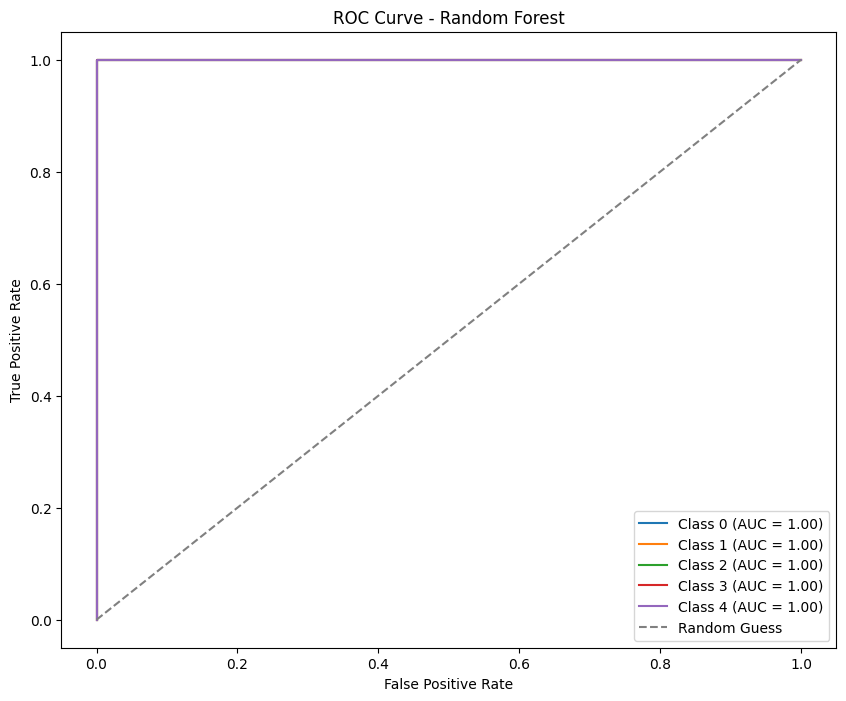

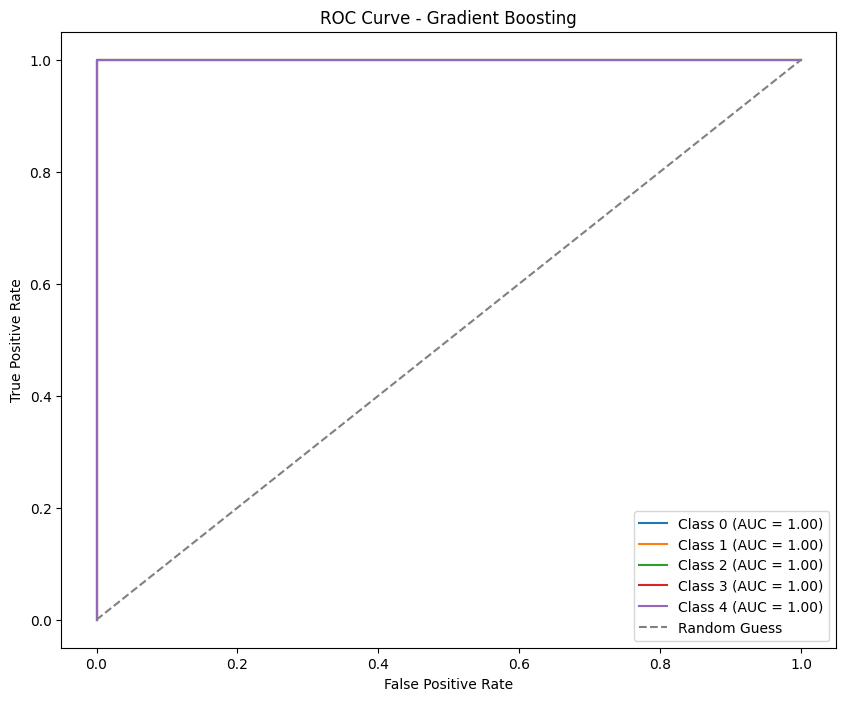

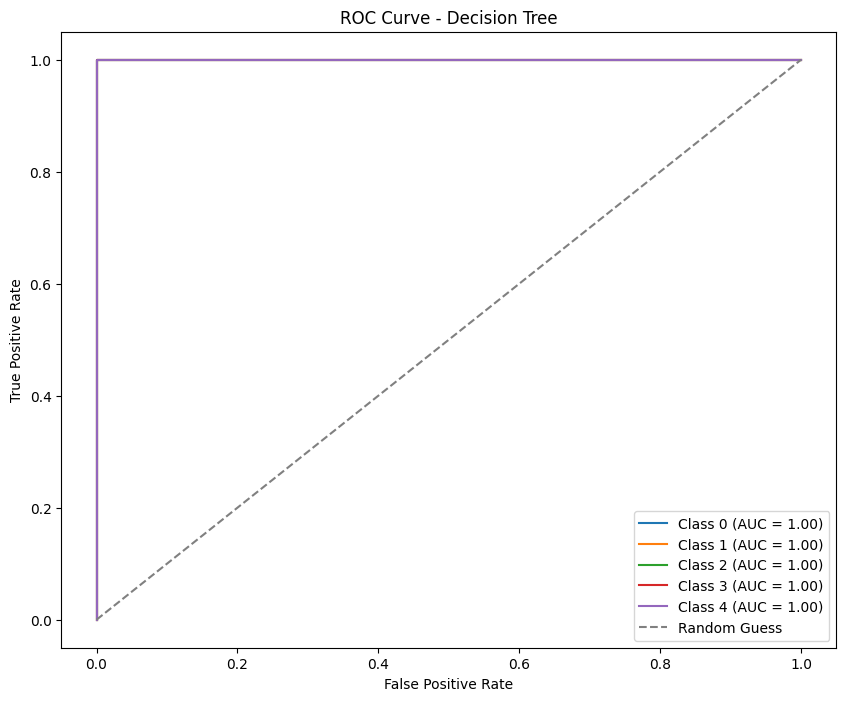

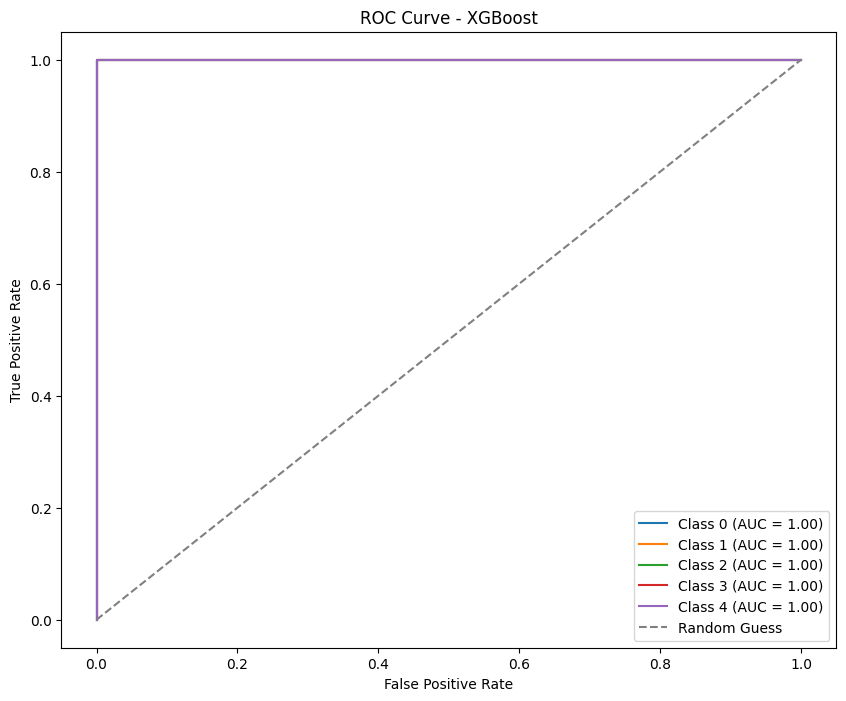

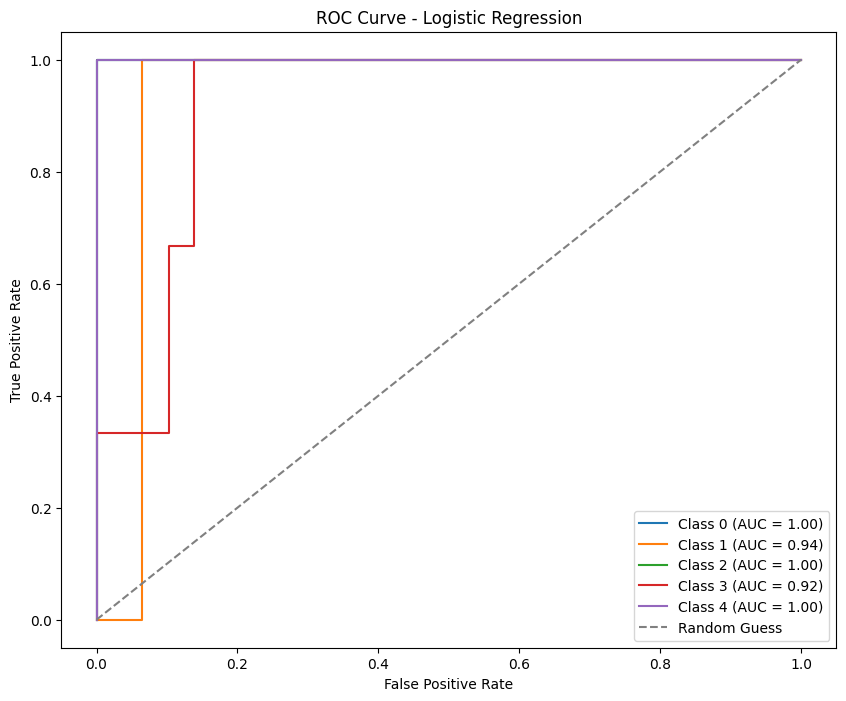

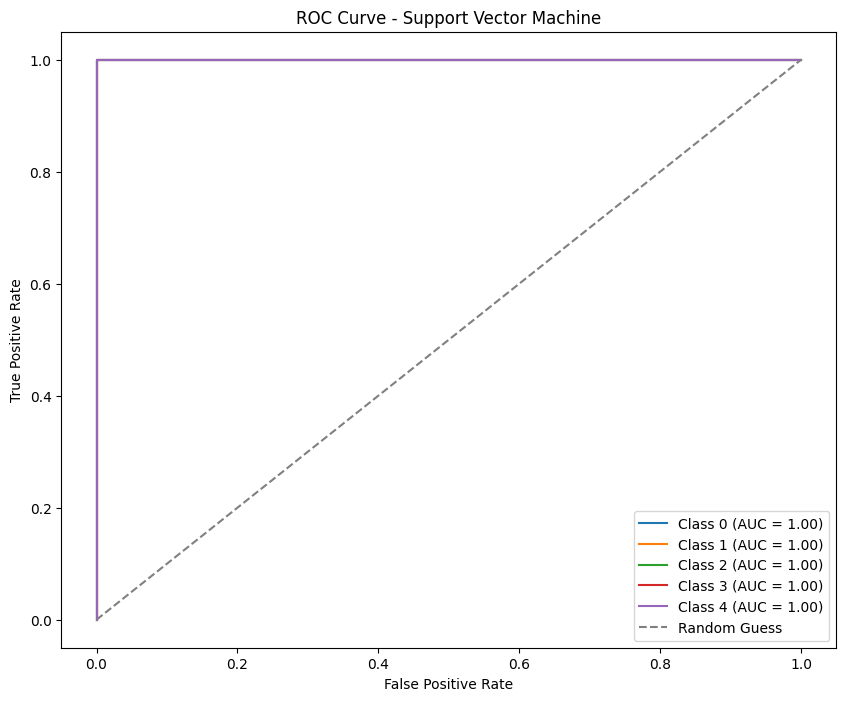

In [167]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizing ground truth labels for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Function to plot ROC curve for the given model
def plot_roc_curve(model_name, y_test_binarized, y_pred_proba, n_classes):
    fpr = {}
    tpr = {}
    roc_auc = {}

    # Checking if the model is binary or multiclass and handling it accordingly
    if y_pred_proba.shape[1] == 1:  # Binary classification
        y_pred_proba = np.hstack([1 - y_pred_proba, y_pred_proba])  # Adding probabilities for the negative class
        
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()

# Getting predicted probabilities for each model
y_pred_rf = rf_model.predict_proba(X_test)  # Random Forest
y_pred_gb = gb_model.predict_proba(X_test)  # Gradient Boosting
y_pred_dt = dt_model.predict_proba(X_test)  # Decision Tree
y_pred_xgb = xgb_model.predict_proba(X_test)  # XGBoost
y_pred_lr = lr_model.predict_proba(X_test)  # Logistic Regression
y_pred_svm = svm_model.predict_proba(X_test)  # Support Vector Machine

# Plotting ROC curves for each model
plot_roc_curve("Random Forest", y_test_binarized, y_pred_rf, n_classes)
plot_roc_curve("Gradient Boosting", y_test_binarized, y_pred_gb, n_classes)
plot_roc_curve("Decision Tree", y_test_binarized, y_pred_dt, n_classes)
plot_roc_curve("XGBoost", y_test_binarized, y_pred_xgb, n_classes)
plot_roc_curve("Logistic Regression", y_test_binarized, y_pred_lr, n_classes)
plot_roc_curve("Support Vector Machine", y_test_binarized, y_pred_svm, n_classes)
